In [17]:
import pandas as pd

# Cargar el archivo TSV
with open("../data/test.tsv", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Almacenar sentimientos por frase
sentiment_counts = {0: 0, 1: 0, 2: 0}

current_sentiment = None  # Variable para almacenar el sentimiento de la frase

for line in lines:
    line = line.strip()
    
    if line == "":  # Si es una línea vacía, se termina una frase
        if current_sentiment is not None:
            sentiment_counts[current_sentiment] += 1  # Contar solo una vez por frase
        current_sentiment = None  # Reiniciar sentimiento para la nueva frase
    else:
        parts = line.split("\t")
        if len(parts) == 3:
            _, _, sentiment = parts
            current_sentiment = int(sentiment)  # Guardar el sentimiento de la frase actual

# Asegurar que la última frase también se cuenta
if current_sentiment is not None:
    sentiment_counts[current_sentiment] += 1

# Imprimir los resultados
print(f"Cantidad de frases con sentimiento 0 (Negativo): {sentiment_counts[0]}")
print(f"Cantidad de frases con sentimiento 1 (Neutral): {sentiment_counts[1]}")
print(f"Cantidad de frases con sentimiento 2 (Positivo): {sentiment_counts[2]}")

print("Suma de frases: ", sum(sentiment_counts.values()))


Cantidad de frases con sentimiento 0 (Negativo): 5000
Cantidad de frases con sentimiento 1 (Neutral): 5000
Cantidad de frases con sentimiento 2 (Positivo): 0
Suma de frases:  10000


In [28]:
from transformers import pipeline

# Load the pretrained sentiment-analysis pipeline
# By default, the pipeline uses a variant of BERT, called distilbert-base-uncased-finetuned-sst-2-english.
sentiment_analyzer = pipeline("sentiment-analysis")

c:\Users\Stealth\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\Stealth\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Stealth\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded vers

In [14]:
def extraer_balanceado(input_file, output_file, max_por_clase=5000):
    with open(input_file, 'r', encoding='utf-8') as f:
        lineas = f.readlines()

    positivas = []
    negativas = []
    frase_actual = []
    sa_actual = None  # Sentiment Analysis de la frase

    for linea in lineas:
        if linea.strip() == "":
            if frase_actual and sa_actual is not None:
                if sa_actual == '1' and len(positivas) < max_por_clase:
                    positivas.append(frase_actual)
                elif sa_actual == '0' and len(negativas) < max_por_clase:
                    negativas.append(frase_actual)

                # Cortamos si ya tenemos todo
                if len(positivas) == max_por_clase and len(negativas) == max_por_clase:
                    break

            frase_actual = []
            sa_actual = None
        else:
            frase_actual.append(linea)
            partes = linea.strip().split('\t')
            if len(partes) == 3:
                sa = partes[2]
                if sa_actual is None:
                    sa_actual = sa  # Se toma el SA del primer token

    # Guardamos las frases seleccionadas
    with open(output_file, 'w', encoding='utf-8') as f:
        for frase in positivas + negativas:
            f.writelines(frase)
            f.write("\n")  # Línea vacía entre frases

# Ejemplo de uso:
extraer_balanceado("../data/output_test.tsv", "train_balanceado_10000.tsv")


In [18]:
from collections import Counter

# Lista de etiquetas posibles
etiquetas = ['B-ANIM', 'B-BIO', 'B-CEL', 'B-DIS', 'B-EVE', 'B-FOOD', 'B-INST', 'B-LOC', 'B-MEDIA', 'B-MYTH',
             'B-ORG', 'B-PER', 'B-PLANT', 'B-TIME', 'B-VEHI',
             'I-ANIM', 'I-BIO', 'I-CEL', 'I-DIS', 'I-EVE', 'I-FOOD', 'I-INST', 'I-LOC', 'I-MEDIA', 'I-MYTH',
             'I-ORG', 'I-PER', 'I-PLANT', 'I-TIME', 'I-VEHI',
             'O']

# Inicializa el contador
conteo_etiquetas = Counter({etiqueta: 0 for etiqueta in etiquetas})

# Ruta del archivo TSV
ruta_tsv = "../data/train.tsv"  # cambia esto por la ruta de tu archivo

# Leer archivo línea por línea
with open(ruta_tsv, 'r', encoding='utf-8') as f:
    for linea in f:
        partes = linea.strip().split('\t')
        if len(partes) >= 2:
            etiqueta = partes[1]
            if etiqueta in conteo_etiquetas:
                conteo_etiquetas[etiqueta] += 1

# Mostrar el conteo
for etiqueta, cantidad in conteo_etiquetas.items():
    print(f"{etiqueta}: {cantidad}")


B-ANIM: 3914
B-BIO: 45
B-CEL: 672
B-DIS: 3145
B-EVE: 775
B-FOOD: 2672
B-INST: 95
B-LOC: 18008
B-MEDIA: 1821
B-MYTH: 139
B-ORG: 8542
B-PER: 17473
B-PLANT: 2501
B-TIME: 726
B-VEHI: 108
I-ANIM: 1710
I-BIO: 12
I-CEL: 370
I-DIS: 2092
I-EVE: 1288
I-FOOD: 973
I-INST: 96
I-LOC: 8005
I-MEDIA: 2934
I-MYTH: 31
I-ORG: 11205
I-PER: 18473
I-PLANT: 857
I-TIME: 556
I-VEHI: 123
O: 765213


In [20]:
import gensim.downloader as api
import numpy as np

# Cargamos GloVe (100 dimensiones)
glove_model = api.load("glove-wiki-gigaword-100")  # Solo se descarga una vez

def sentence_to_embeddings(sentence, model=glove_model, dim=100):
    """
    Converts a list of words into a list of GloVe embeddings.

    Args:
        sentence (list of str): Words in the sentence.
        model: GloVe embedding model (gensim).
        dim (int): Embedding dimension (default 100).

    Returns:
        List[np.ndarray]: Embedding vectors for each word in the sentence.
    """
    return [model[word] if word in model else np.zeros(dim) for word in sentence]


[==================================================] 100.0% 128.1/128.1MB downloaded


In [29]:
def embedding_to_word(embedding, model, topn=1):
    """
    Returns the most similar word(s) in the embedding space.

    Args:
        embedding (np.ndarray): The embedding vector.
        model: Gensim embedding model.
        topn (int): Number of closest words to return.

    Returns:
        str or list: Closest word(s) to the given embedding.
    """
    similar = model.similar_by_vector(embedding, topn=topn)
    if topn == 1:
        return similar[0][0]  # Return just the word
    return [word for word, _ in similar]


In [28]:
sentence = ["The", "cat", "jumps", "over", "the", "moon"]
embeddings = sentence_to_embeddings(sentence)

print(f"Sentence has {len(embeddings)} embeddings")
print(f"First embedding shape: {embeddings[0].shape}")
print(embeddings[5])  # Vector for "The"


Sentence has 6 embeddings
First embedding shape: (100,)
[-7.8748e-01 -8.8856e-02  7.4988e-01  5.2854e-01  1.5981e-03 -3.6809e-01
  6.8798e-01  3.5121e-01  9.2334e-02 -1.8281e-01 -1.8805e-01  4.1248e-02
  8.1858e-01  1.3372e-01  4.1265e-01 -9.0320e-01  2.7627e-01  1.0296e+00
  2.3443e-02 -1.9191e-01  3.1135e-01 -2.4538e-01 -9.9959e-01  1.5308e-01
  3.2938e-01  1.6536e+00 -4.5521e-01  6.1071e-01  2.5204e-01 -2.0436e-02
 -8.0607e-02 -5.4737e-01  2.1745e-01  3.2106e-01  1.6707e-01  2.0752e-01
  2.5431e-01  1.0649e+00 -4.4017e-01 -5.2955e-01 -1.5593e+00  1.2501e-01
 -2.5508e-01  6.0666e-01 -8.8813e-02 -6.3777e-02 -1.0711e+00 -6.9952e-02
  4.0339e-01 -1.4294e-01  2.0297e-01 -3.9117e-01  2.4745e-01  5.7762e-01
 -4.1829e-01 -2.2361e+00 -1.6890e-01  1.1592e+00  1.0618e+00  1.5931e-01
  1.1075e-02  1.0953e+00  1.9624e-01 -9.1754e-02  2.9670e-01  3.2959e-01
  5.3982e-01  2.3443e-01 -4.3785e-01 -2.2062e-02  4.4584e-01 -1.1955e-01
 -3.9980e-01 -3.9603e-01 -2.2918e-01 -2.6091e-01  4.0502e-01  7.2410

In [2]:
from typing import Tuple, List, Dict, Any

import pandas as pd
import random
import re

import matplotlib.pyplot as plt

from gensim.models.keyedvectors import load_word2vec_format

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
SEED = 2222

random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [3]:
import gdown
import zipfile

# Google Drive direct download link
url = 'https://drive.google.com/uc?id=1zQRH1zYBHJ_vU_uMkKvvvwQiZwP5N7wW'

# Destination file name
output = 'NLP_DATA.zip'

# Download the file
gdown.download(url, output, quiet=False)

# Unzip the downloaded file
with zipfile.ZipFile(output, 'r') as zip_ref:
     zip_ref.extractall('.')

Downloading...
From (original): https://drive.google.com/uc?id=1zQRH1zYBHJ_vU_uMkKvvvwQiZwP5N7wW
From (redirected): https://drive.google.com/uc?id=1zQRH1zYBHJ_vU_uMkKvvvwQiZwP5N7wW&confirm=t&uuid=fb093cc9-c1cf-47bc-9988-5ab0cf6d6fa2
To: c:\Users\Stealth\OneDrive - Universidad Pontificia Comillas\Documentos\Uni\3º iMAT\CUATRI_2\NLP\NerD\src\NLP_DATA.zip
  3%|▎         | 50.3M/1.65G [00:08<04:32, 5.88MB/s]

KeyboardInterrupt: 

  3%|▎         | 50.9M/1.65G [00:20<04:31, 5.88MB/s]

In [3]:
import gdown
import zipfile
# Load embeddings model to use in the assignment
w2v_model = load_word2vec_format("../data/NLP_Data/embeddings/GoogleNews-vectors-negative300.bin.gz", binary = True)

In [4]:
# save the model
w2v_model.save("../models/w2v_model.bin")

In [6]:
from gensim.models.keyedvectors import load_word2vec_format

# Cargar el modelo Word2Vec binario
w2v_model = load_word2vec_format("../models/w2v_model.bin", binary=True)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [14]:
def get_embedding(word, model, unk_token="UNK"):

    if word in model:
        return torch.tensor(model[word], dtype=torch.float32)
    elif unk_token in model:
        return torch.tensor(model[unk_token], dtype=torch.float32)

In [15]:
w2v_model["UNK"]

type(get_embedding("Kīlauea", w2v_model))

torch.Tensor

In [ ]:
sentence = ["The", "cat", "jumps", "over", "the", "moon"]
embeddings = [get_embedding(word, w2v_model) for word in sentence]
# convert to tensor
embeddings = torch.tensor(embeddings, dtype=torch.float32) 

torch.Size([6, 300])


c:\Users\Stealth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


✅ Imagen final con gradiente azul claro conservado guardada como: bannerNerD_blue_gradient_fixed_light.jpg


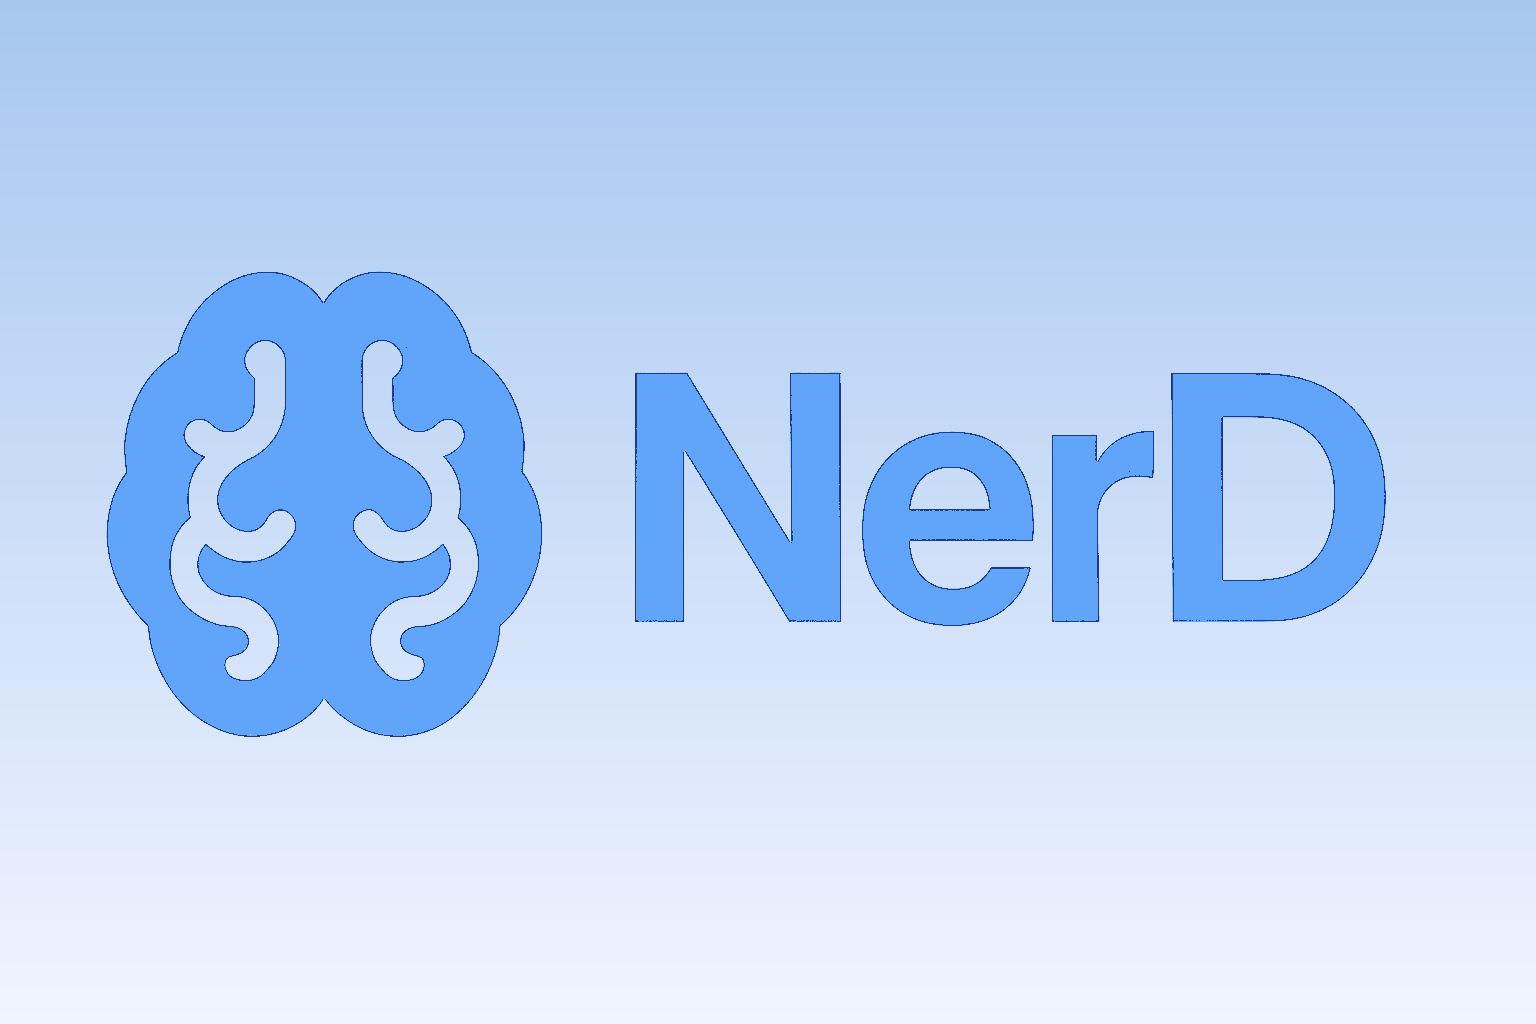

In [6]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import colorsys

# Paleta azul personalizada
blue_palette = np.array([
    [240, 244, 255],  # #F0F4FF
    [226, 232, 240],  # #E2E8F0
    [147, 197, 253],  # #93C5FD
    [96, 165, 250],   # #60A5FA
    [30, 58, 138]     # #1E3A8A
])

def closest_color(color, palette):
    distances = np.linalg.norm(palette - color, axis=1)
    return palette[np.argmin(distances)]

def is_background(rgb):
    hsv = colorsys.rgb_to_hsv(*(rgb / 255.0))
    return hsv[1] < 0.25 or hsv[2] > 0.92  # Saturación baja o brillo alto

def create_blue_gradient(size, color1, color2):
    """Crea un degradado vertical de azul claro a blanco."""
    w, h = size
    base = Image.new('RGB', size, color1)
    top = Image.new('RGB', size, color2)
    mask = Image.linear_gradient("L").resize((w, h))
    return Image.composite(top, base, mask)

def recolor_with_blue_gradient(img_path, n_colors=6):
    img = Image.open(img_path).convert('RGB')
    img_np = np.array(img)
    pixels = img_np.reshape((-1, 3))

    # Máscara para fondo
    background_mask = np.array([is_background(p) for p in pixels])
    object_pixels = pixels[~background_mask]

    # KMeans solo sobre objetos (no fondo)
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(object_pixels)
    clustered = kmeans.predict(pixels)

    # Crear fondo gradiente (de azul claro a blanco)
    gradient_img = create_blue_gradient(img.size, (167, 199, 240), (240, 244, 255))  # Azul claro a blanco
    gradient_np = np.array(gradient_img)

    # Mezclar imagen final
    result_np = img_np.copy()
    h, w, _ = img_np.shape

    for i in range(h):
        for j in range(w):
            idx = i * w + j
            if background_mask[idx]:
                result_np[i, j] = gradient_np[i, j]
            else:
                cluster_id = clustered[idx]
                new_color = closest_color(kmeans.cluster_centers_[cluster_id], blue_palette)
                result_np[i, j] = new_color

    result_img = Image.fromarray(result_np.astype(np.uint8))
    out_path = "bannerNerD_blue_gradient_fixed_light.jpg"
    result_img.save(out_path)
    print(f"✅ Imagen final con gradiente azul claro conservado guardada como: {out_path}")
    return result_img

# Ejecutar
recolor_with_blue_gradient("../images/bannerNerD.jpg")


✅ Imagen con colores cercanos a [150 108 206] cambiados a [ 30  58 138] guardada como: modified_image_with_tolerance.jpg


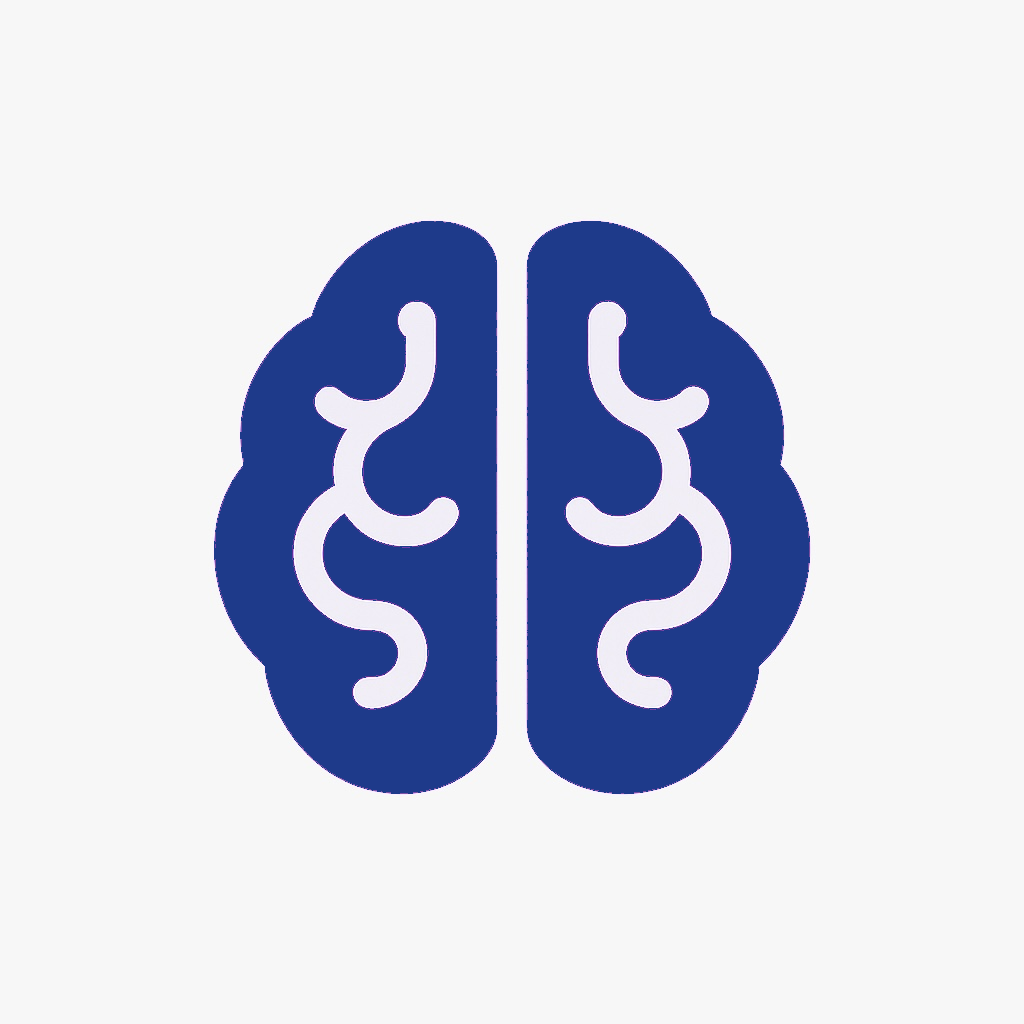

In [13]:
from PIL import Image
import numpy as np

def recolor_with_tolerance(img_path, original_color, target_color, tolerance=30):
    img = Image.open(img_path).convert('RGB')
    img_np = np.array(img)

    # Convertir los colores a arrays de numpy
    original_color = np.array(original_color)
    target_color = np.array(target_color)

    # Calcular la diferencia entre dos colores (en espacio RGB)
    def color_distance(c1, c2):
        return np.linalg.norm(c1 - c2)

    # Crear una máscara para los píxeles dentro del rango de tolerancia
    mask = np.array([color_distance(pixel, original_color) < tolerance for pixel in img_np.reshape(-1, 3)])

    # Reemplazar los píxeles que cumplen la condición con el color objetivo
    img_np.reshape(-1, 3)[mask] = target_color

    # Crear la nueva imagen
    result_img = Image.fromarray(img_np.astype(np.uint8))

    # Guardar la imagen modificada
    out_path = "modified_image_with_tolerance.jpg"
    result_img.save(out_path)
    print(f"✅ Imagen con colores cercanos a {original_color} cambiados a {target_color} guardada como: {out_path}")

    return result_img

# Definir los colores
original_color = [150, 108, 206]  # #62A4FA
target_color = [30, 58, 138]    # #1E3A8A

# Ejecutar el cambio de color con un rango de tolerancia
recolor_with_tolerance("../images/logo.jpg", original_color, target_color, tolerance=50)
